In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')

# Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [3]:
df = df.dropna()

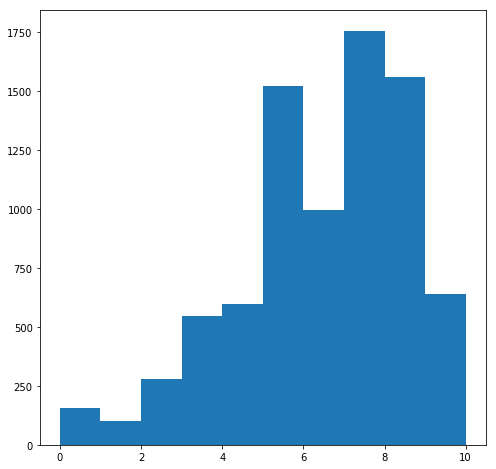

In [4]:
plt.figure(figsize=(8,8))
plt.hist(df['pplfair'])
plt.show()

In [5]:
sp.stats.ttest_ind(df[df.year==6].ppltrst,df[df.year==7].ppltrst)

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [6]:
df.groupby('cntry').mean()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
cntry,,,,,,,,,,,,
CH,1.469243e+03,6.503729,3.075932,5.725424,6.267797,5.685424,8.113220,5.149831,2.747797,1.511186,46.667797,1.364746
CZ,1.449925e+03,6.502071,4.871582,4.379453,4.909693,4.457332,6.856669,4.613090,2.673571,1.526098,45.812759,1.423364
DE,1.100049e+07,6.518519,3.962963,5.222222,6.222222,5.444444,7.592593,4.666667,2.814815,1.592593,56.962963,1.259259
ES,1.471413e+03,6.494764,3.934119,5.034904,5.365620,4.546248,7.504799,5.242583,2.601222,1.502618,47.571990,1.384380
NO,1.429086e+04,6.501408,3.741549,6.623944,6.888732,6.043662,8.085915,5.436620,2.914085,1.466197,46.334507,1.369718
SE,1.811748e+03,6.502317,3.624565,6.141947,6.665701,6.048088,7.920046,5.485516,2.895133,1.477984,48.983778,1.389340


In [7]:
CH = df[df['cntry']=='CH']
CZ = df[df['cntry']=='CZ']
DE = df[df['cntry']=='DE']
ES = df[df['cntry']=='ES']
NO = df[df['cntry']=='NO']
SE = df[df['cntry']=='SE']
countries = [CH, CZ, DE, ES, NO, SE]

In [8]:
country_names = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
i = 0
for x in countries:
    print(str(country_names[i]) + ': ' + str(sp.stats.ttest_ind(x[x.year==6].ppltrst,x[x.year==7].ppltrst)))
    i += 1

CH: Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ: Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE: Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES: Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO: Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
SE: Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


# Did people become happier from 2012 to 2014? Compute results for each country in the sample.

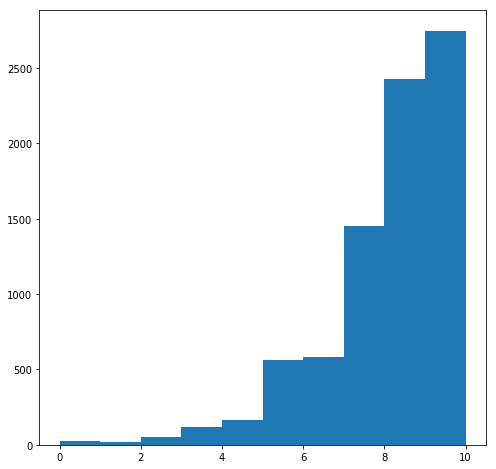

In [9]:
plt.figure(figsize=(8,8))
plt.hist(df['happy'])
plt.show()

In [10]:
country_names = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
i = 0
for x in countries:
    print(str(country_names[i]) + ': ' + str(sp.stats.ttest_ind(x[x.year==6].happy,x[x.year==7].happy)))
    i += 1

CH: Ttest_indResult(statistic=-0.812142488327401, pvalue=0.4168411011770018)
CZ: Ttest_indResult(statistic=-1.1592536826704618, pvalue=0.24658245820500238)
DE: Ttest_indResult(statistic=-0.966317541228559, pvalue=0.3431409128727073)
ES: Ttest_indResult(statistic=1.3750588408504656, pvalue=0.16924771370417369)
NO: Ttest_indResult(statistic=4.152957205997266, pvalue=3.4778681704487346e-05)
SE: Ttest_indResult(statistic=-0.5372790210326394, pvalue=0.5911442306272388)


# Who reported watching more TV in 2012, men or women?

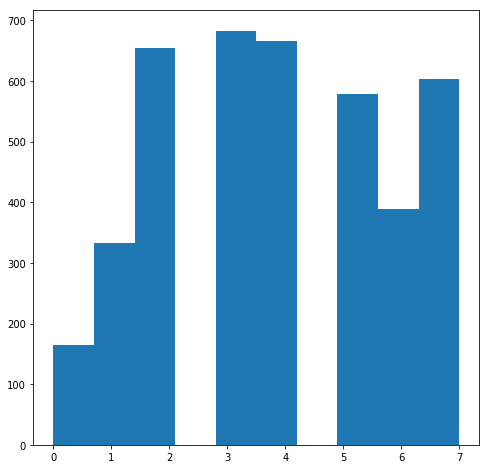

In [11]:
plt.figure(figsize=(8,8))
plt.hist(df[df.year==6].tvtot)
plt.show()

In [12]:
df[df.year==6].groupby('gndr').mean()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea,partner
gndr,,,,,,,,,,,
1.0,30648.933268,6,3.859230,5.631271,5.935704,5.28300,7.751096,5.257185,2.776912,46.858256,1.356551
2.0,47288.428147,6,3.905352,5.524777,6.057483,5.50446,7.711596,5.256690,2.712587,47.803271,1.394945


In [13]:
year_2012 = df[df.year==6]

In [14]:
sp.stats.ttest_ind(year_2012[year_2012.gndr==1.0].tvtot,year_2012[year_2012.gndr==2.0].tvtot)

Ttest_indResult(statistic=-0.7323552192640558, pvalue=0.4639939646110154)

## Neither watched significantly more TV according to their gender

# Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [15]:
sp.stats.ttest_ind(year_2012[year_2012.gndr==1.0].pplfair, year_2012[year_2012.partner==2.0].pplfair)

Ttest_indResult(statistic=0.9715565858386009, pvalue=0.3313368257437276)

## Neither

# Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

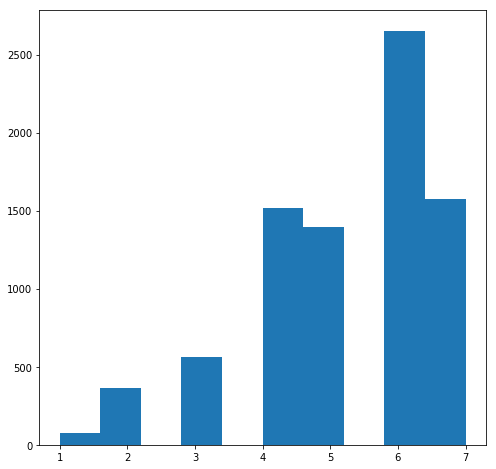

In [16]:
plt.figure(figsize=(8,8))
plt.hist(df['sclmeet'])
plt.show()

In [17]:
df.groupby('cntry').mean()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
cntry,,,,,,,,,,,,
CH,1.469243e+03,6.503729,3.075932,5.725424,6.267797,5.685424,8.113220,5.149831,2.747797,1.511186,46.667797,1.364746
CZ,1.449925e+03,6.502071,4.871582,4.379453,4.909693,4.457332,6.856669,4.613090,2.673571,1.526098,45.812759,1.423364
DE,1.100049e+07,6.518519,3.962963,5.222222,6.222222,5.444444,7.592593,4.666667,2.814815,1.592593,56.962963,1.259259
ES,1.471413e+03,6.494764,3.934119,5.034904,5.365620,4.546248,7.504799,5.242583,2.601222,1.502618,47.571990,1.384380
NO,1.429086e+04,6.501408,3.741549,6.623944,6.888732,6.043662,8.085915,5.436620,2.914085,1.466197,46.334507,1.369718
SE,1.811748e+03,6.502317,3.624565,6.141947,6.665701,6.048088,7.920046,5.485516,2.895133,1.477984,48.983778,1.389340


In [18]:
# CH, CZ, DE

In [19]:
CH_2014 = CH[CH.year==6]
CZ_2014 = CZ[CZ.year==6]
DE_2014 = DE[DE.year==6]
countries_2014 = [CH_2014, CZ_2014, DE_2014]

In [20]:
F, p = stats.f_oneway(
    CH_2014.sclmeet,
    CZ_2014.sclmeet,
    DE_2014.sclmeet)

In [21]:
print(F)

11.844789295056742


In [22]:
print(p)

7.95639252996356e-06


In [23]:
print(stats.ttest_ind(CH_2014.sclmeet, CZ_2014.sclmeet))
print(stats.ttest_ind(CH_2014.sclmeet, DE_2014.sclmeet))
print(stats.ttest_ind(CZ_2014.sclmeet, DE_2014.sclmeet))

Ttest_indResult(statistic=4.855947325584417, pvalue=1.3399330486546011e-06)
Ttest_indResult(statistic=0.5452856099939198, pvalue=0.5857207463645546)
Ttest_indResult(statistic=-0.42145894685106416, pvalue=0.6735679678771813)


# Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [24]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [25]:
F, p = stats.f_oneway(
    CH_2014.sclact,
    CZ_2014.sclact,
    DE_2014.sclact)

print(F)
print(p)

2.2685144373158095
0.10386210137274612


In [26]:
print(stats.ttest_ind(CH_2014.sclact, CZ_2014.sclact))
print(stats.ttest_ind(CH_2014.sclact, DE_2014.sclact))
print(stats.ttest_ind(CZ_2014.sclact, DE_2014.sclact))

Ttest_indResult(statistic=1.8766582063310397, pvalue=0.060783586634628996)
Ttest_indResult(statistic=-0.8697759220637884, pvalue=0.3847037669474307)
Ttest_indResult(statistic=-1.1623673917440294, pvalue=0.24553933269298717)
